# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Mar 19 (Monday) 11:00 pm </font>  

Rohini Isarapu

# I. Overview

The objective of this assignment is implementation of reinforcement learning on Maze and Black Jack. 
Grid World involves 3 types of states: 
Open :agent can move in the environment without restrictions.
Wall or Obstacle : agent should not go towards it 
Goal : destinaion of the agent. 

The agent has four actions: Left, Right, Up, and Down. The agent is rewarded with -1 point if it reaches the Wall or Obstacle,rewarded with -5 points if the resulting input is not valid,rewarded with +30 points if it reaches the goal.

Blackjack is comparision of the cards between a player and dealer. There can be n number of players but only one dealer.
The goal is to obtain a sum equal to 21 or near to 21. If the sum of cards is greater than 21 then the player is out of the game. The player and the dealer cards are compared to know determine who wins.

Face cards (Jack, Queen, King) has a value of 10. Aces can either be counted as 11 or 1, and it’s called ‘usable’ at 11. 

Reinforcement learning can be implemented using either Q-learning or SARSA.


# II. Problems 

## A. Maze Problem (Practice)

The Maze problem is used to find the optimal path to reach the goal in the environment which has open spaces as well as Wall or Obstacle.

The Gridworld class reads the maze problem from grid.txt file.init function instansiates the Grid world environment.get_cur_state function returns the current state of the agent. is_goal returns the state which has G.get_functions returns all the possible actions. The get_size returns the dimensions of the grid.read_map returns the grid which has been initialized in init().print_map returns the initialized grid. In the init function the user can give the starting state to the agent. The check_state function checks whether the input values is None or invalid.In the next function the state transition takes place depending upon the action. Based on the action selected and the state the agent reaches rewards are allocated to the agent. The rewards are as follows
G = 30, O = -1, H and others = -5.

In [229]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [230]:
%%cmd
type grid.txt

Microsoft Windows [Version 10.0.16299.248]
(c) 2017 Microsoft Corporation. All rights reserved.

C:\Users\isara\Downloads>type grid.txt
OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOO
OOHOOOOOH
OOHOOOGOO
OOOOOOOOO
C:\Users\isara\Downloads>

### GridWorld Class


In [231]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [232]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


In [233]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

RLAgent for Maze
Read the understand the codes below and explain it with your words. Do NOT forget to answer the question.

## B. Blackjack-V0

![](https://upload.wikimedia.org/wikipedia/commons/a/a2/Blackjack_game_1.JPG)

Now, we play Blackjack! 
https://gym.openai.com/envs/Blackjack-v0/


# III. Methods

Temporal difference (TD) learning considers that the agent knows only the partial information of the MDP. With only current and next state transition and without any model transition probability, TD lets the agent explore the environment to examine the random policy.

For control problems, we have defined Q function above to evaluate the state and action altogether. Updating the Q values with TD learning is similar to previous update with two different considerations. First, we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as on-policy control, or SARSA.

                                       Q(st,at)←Q(st,at)+α(Rt+1+γQ(st+1,at+1)−Q(st,at))

Without making assumption of behavior policy, we can explore other possible policies to update the Q. We call this as off-policy control, or Q-learning.

                                       Q(st,at)←Q(st,at)+α(Rt+1+γmaxaQ(st+1,a)−Q(st,at))

I am implementing Q-Learning for the assignment as it is independent of the policy.

Epsilon Greedy Function:

The Epsilon Greedy function solves the problem of exploration-exploitation dilemma. We can control the the exploration and exploitation level as the parameter value is between 0-1.When the epsilon value is equal to zero the actions are selected in a greedy manner, but when the epsilon value is 1 thean a random action is selected.

Code Explanation:

The _init_ function initializes the environment,size,actions and the Q table. The greedy function returns the maximum value from The Q table. The epsilon_greed function returns a randomn action if epsilon is less than the randomn value otherwise it chooses the action with maximum value. The train function has the parameters gamma=0.99, alpha=0.1,epsilon=0.1(This allows for more exploration),maxiter=1000,maxstep=1000. If the agent reaches the wall or obstacle the value will be set to -infinity.The rtrace has the rewards appended to it per epoch and the steps has the number the steps the agent has taken to reach the goal per epoch.The Q table is updated based on the state and actions by using the Q learning formula: self.Q[s[0], s[1], a] += alpha * (r + gamma * np.max(self.Q[s1[0], s1[1],:])- (self.Q[s[0], s[1], a])). When the goal is reached before the iterations are reached it is set to zero and it breaks out of the loop.The test function returns the maximum action from the learned policy.




## RLAgent for Maze

Read the understand the codes below and explain it with your words. 
Do NOT forget to answer the question. 

In [234]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def greedy(self,Q,s):
        return np.argmax(Q[s[0],s[1]])  # greedy action selection
    
    def epsilon_greed(self,epsilon,s):   
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return self.greedy(self.Q,s)
        # TODO: Finish this function
   
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                self.Q[s[0], s[1], a] += alpha * (r + gamma * np.max(self.Q[s1[0], s1[1],:])- (self.Q[s[0], s[1], a]))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        
        gamma =  0.99
        alpha = 0.1
        epsilon= 0.1
        maxiter= 100 
        maxstep= 100 
        steps = []
        for j in range(maxiter):
            env.init(start)
            s = env.get_cur_state()
            a = self.epsilon_greed(epsilon, s)
            trace = np.array(coord_convert(s, self.size))
            for step in range(maxstep):
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                p = np.argmax(self.Q)
                if env.is_goal():
                    # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            #p = np.argmax(self.Q,axis=2)
                
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
          
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 

        return trace            

### Utility functions for Plotting

- finish the TODOs here for plotting

In [235]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    ax.plot(rtrace,'-',color='b')
    # TODO: plot rewards 
    
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    ax1.plot(steps,'-',color='b')
    # TODO: plot steps
    
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld

### The results may differ when executed again. If there is a difference,needs to executed a few times.

                             


In [236]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

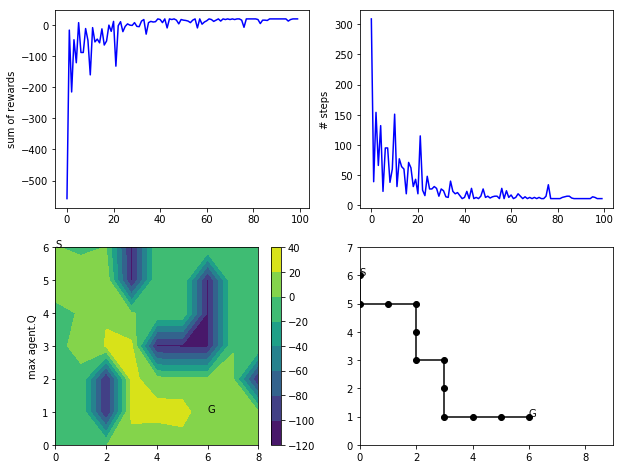

In [237]:
plot_train(agent, rtrace, steps, trace, start)

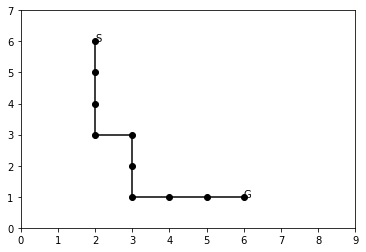

In [238]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

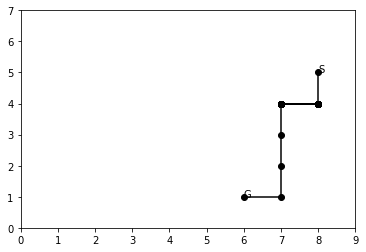

In [239]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

### High Epsilon

In [128]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.9, 
                                   alpha=1, 
                                   epsilon=0.7, 
                                   maxiter=100, 
                                   maxstep=1000)

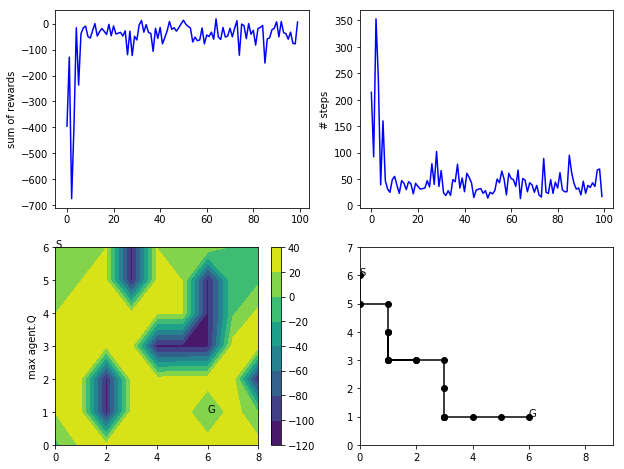

In [129]:
plot_train(agent, rtrace, steps, trace, start)

### Low Gamma

In [130]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.4, 
                                   alpha=1, 
                                   epsilon=0.2, 
                                   maxiter=100, 
                                   maxstep=1000)

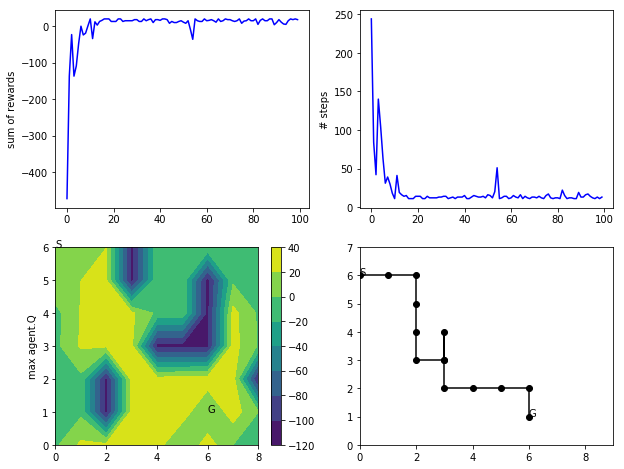

In [131]:
plot_train(agent, rtrace, steps, trace, start)

### Low Alpha

In [132]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   amma=0.9, 
                                   alpha=0.4, 
                                   epsilon=0.2, 
                                   maxiter=100, 
                                   maxstep=1000)

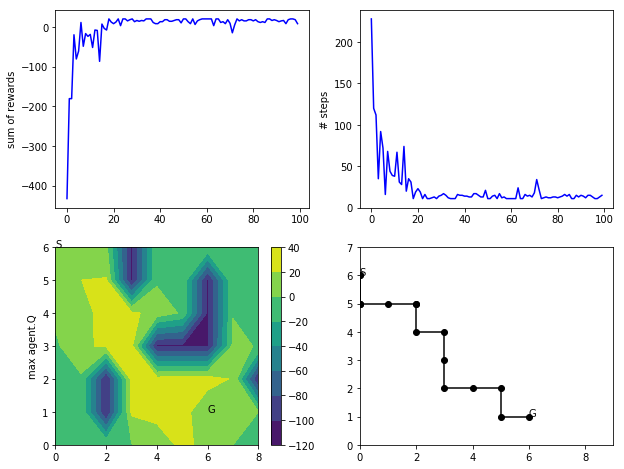

In [133]:
plot_train(agent, rtrace, steps, trace, start)

# IV - Results

The best parameters would be gamma=0.99, alpha=1, epsilon=0.1 as it reaches the goal in the shortest possible way.

Choice Of Epsilon: When I experimented with high epsilon value, the exploration rate was very high due to this it can't achieve the shortest path possible. So I chose low epsilon value.

Choice of Alpha: The alpha is between 0 to 1. The higher the reward rate the higher are the chances for the agent to learn quickly.THe lower the alpha, there is a change in the number of steps(high).

Choice of Gamma: Gamma or discount factor emphasizes on the future rewards. If gamma value is zero then it will consider only the current rewards. If the gamma value is high or 1 it will search for long term rewards.

Reading and analysis of learning results and plots:

In the initial stage, the agent will take a lot of steps to explore the environment and will have low rewards. After the agent learns more about the environment and explores it takes minimal actions and high rewards, thus reaching the goal by taking the shortest path.



# II. Problems 

## B. BlackJack Problem (Practice)

The BlackJack problem is used to find the startergy to earn more when compared to the average casino player. 

The face cards (Jack, Queen, King) has a value of 10. Aces can either be counted as 11 or 1, and it’s called ‘usable’ at 11.
The game starts with player and dealer having one face up and one face down card.

The player can take extra cards until they stop or till they are busted(greater than 21). The dealer shows their facedown card and draws the crads till their sum is equal to 17 or greater than 17,if the player plays/sticks. The player wins if the dealer goes busted. If neither the player nor dealer busts, the results is in favour of player/dealer whose sum of the cards is near to 21. Rewards for win is +1,fro losing is -1 and if it is a draw then it is 0.

Code Explanation:

The draw_card function draws a randomn card from the deck. The draw_hand function draws two cards from the deck.The usable_ace function checks if it has a usable ace or not.The sum_hand function returns the sum of the total cards present.is_bust function checks if the outcome is >21 or not.score function returns zero if busted else it returns the score of the hand. THe step function returns the observations as well as the rewards.The observation of a 3-tuple of: the players current sum,the dealer's one showing card (1-10 where 1 is ace),and whether or not the player holds a usable ace (0 or 1). The _get_obs returns the observation whereas the reset function resets the entire environment.





# III. Methods
Temporal difference (TD) learning considers that the agent knows only the partial information of the MDP. With only current and next state transition and without any model transition probability, TD lets the agent explore the environment to examine the random policy.

For control problems, we have defined Q function above to evaluate the state and action altogether. Updating the Q values with TD learning is similar to previous update with two different considerations. First, we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as on-policy control, or SARSA.

                                   Q(st,at)←Q(st,at)+α(Rt+1+γQ(st+1,at+1)−Q(st,at))
Without making assumption of behavior policy, we can explore other possible policies to update the Q. We call this as off-policy control, or Q-learning.

                                   Q(st,at)←Q(st,at)+α(Rt+1+γmaxaQ(st+1,a)−Q(st,at))
I am implementing Q-Learning for the assignment as it is independent of the policy.

Epsilon Greedy Function:

The Epsilon Greedy function solves the problem of exploration-exploitation dilemma. We can control the the exploration and exploitation level as the parameter value is between 0-1.When the epsilon value is equal to zero the actions are selected in a greedy manner, but when the epsilon value is 1 thean a random action is selected.

Code Explanation:

The init function initializes the environment,episodes to train,actions and the Q table which is taken as a dictionary. The Q_newS function returns an action with zero values if the state is not present in the Q table. The greedy function returns the maximum value from The Q table. The epsilon_greed function returns a randomn action if epsilon is less than the randomn value otherwise it chooses the action with maximum value. The train function has the parameters gamma=0.99, alpha=0.1,epsilon=0.1(This allows for more exploration),maxiter=1000,maxstep=1000. The average_rewards has the average rewards appended to it per epoch.The game is started by initializing the game to 1. The Q table is updated based on the state and actions by using the Q learning formula: self.Q[s[0], s[1], a] += alpha (r + gamma np.max(self.Q[s1[0], s1[1],:])- (self.Q[s[0], s[1], a])). When the goal is reached the game is incremented and the process is iterated.

## RLAgent for Gym (Blackjack-V0)

In [134]:
import gym
import matplotlib.pyplot as plt
from gym import wrappers
env = gym.make('Blackjack-v0')
import random

class BJAgent():
    def __init__(self, env,episodes_to_train):
        self.env = env
        self.episodes_to_train = episodes_to_train
        self.n_a = list(range(self.env.action_space.n))
        self.Q = dict()     
   
    def Q_newS(self, s):
        if s not in self.Q:
            self.Q[s] = dict((a, 0.0) for a in self.n_a)

    def greedy(self, s):
        self.Q_newS(s)
        return max(self.Q[s].values())

    def epsilon_greed(self, s,epsilon):
        self.Q_newS(s)
        if random.random() > epsilon:
            maxQ = self.greedy(s)
            a = random.choice([k for k in self.Q[s].keys()
                                    if self.Q[s][k] == maxQ])
        else:
            a = random.choice(self.n_a)

        return a


    def train(self, **params):
        
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        s = env.reset()
        total_reward = 0 
        average_rewards = [] 
        num_episodes_values = range(200, 2200, 200)
        for sample in range(maxiter):
            game = 1
            while game <= maxstep:
                        action = self.epsilon_greed(s,epsilon)
                        s1, reward, is_done, _ = env.step(action)
                        self.Q[s][action] += alpha * (reward
                                                             + (gamma * self.greedy(s1))
                                                             - self.Q[s][action])
                        total_reward = total_reward + reward
                        s = s1
                        if is_done:
                            s = env.reset() 
                            game = game + 1
                            average_rewards.append(total_reward/(sample*maxstep + game))
                        
        return average_rewards


### High Epsilon

For episode: 200


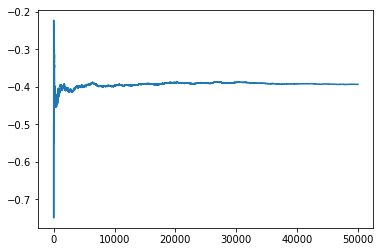

For episode: 400


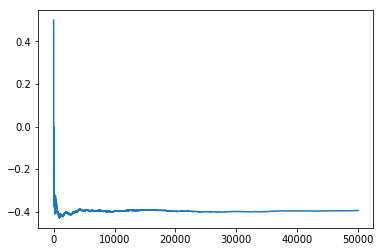

For episode: 600


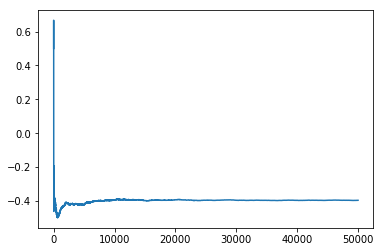

For episode: 800


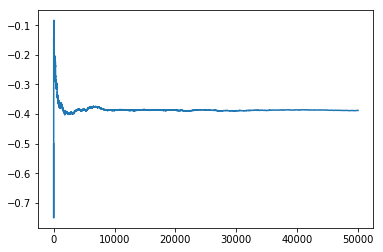

For episode: 1000


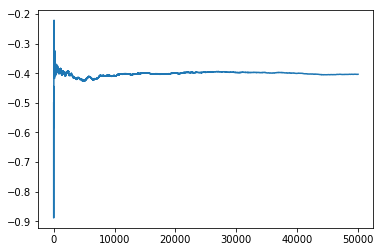

For episode: 1200


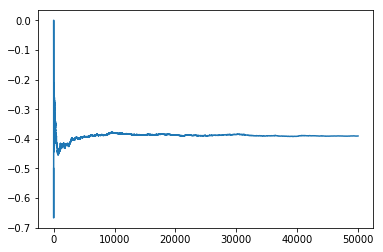

For episode: 1400


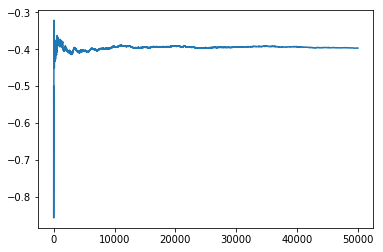

In [135]:
num_episodes_values = range(200, 1600, 200)
for num_episodes_value in num_episodes_values:
    agent = BJAgent(env=env,episodes_to_train=num_episodes_value)
    average_rewards = agent.train(gamma=1,
                                   alpha=0.1, 
                                   epsilon=1,
                                   maxiter=1000, 
                                   maxstep=50)
    print("For episode:",num_episodes_value)
    plt.plot(average_rewards)
    plt.show()

### Low Epsilon

For episode: 200


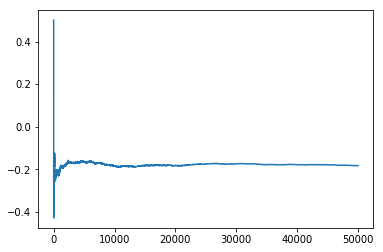

For episode: 400


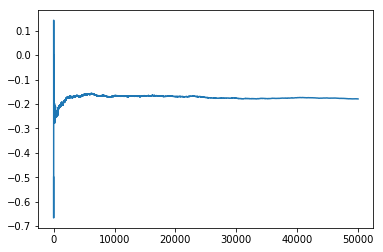

For episode: 600


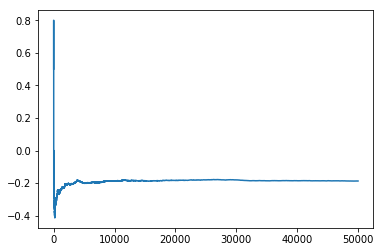

For episode: 800


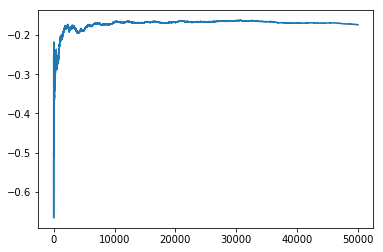

For episode: 1000


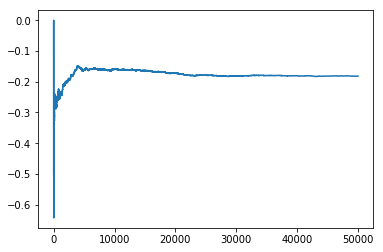

For episode: 1200


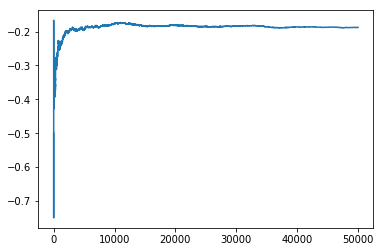

For episode: 1400


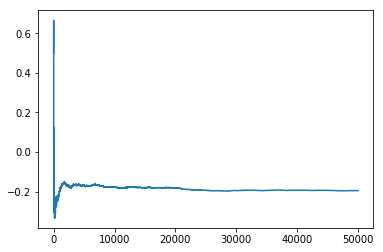

In [136]:
num_episodes_values = range(200, 1600, 200)
for num_episodes_value in num_episodes_values:
    agent = BJAgent(env=env,episodes_to_train=num_episodes_value)
    average_rewards = agent.train(gamma=0.9,
                                   alpha=0.1, 
                                   epsilon=0.1,
                                   maxiter=1000, 
                                   maxstep=50)
    print("For episode:",num_episodes_value)
    plt.plot(average_rewards)
    plt.show()

### Low Alpha

For episode: 200


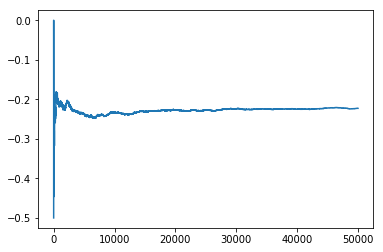

For episode: 400


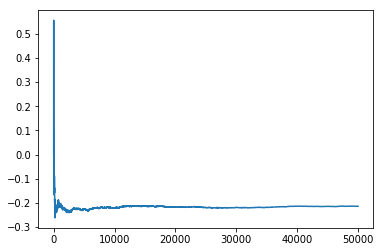

For episode: 600


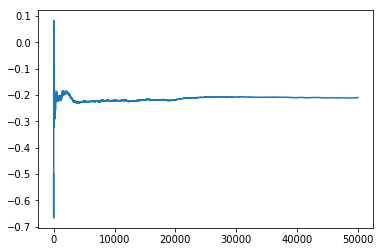

For episode: 800


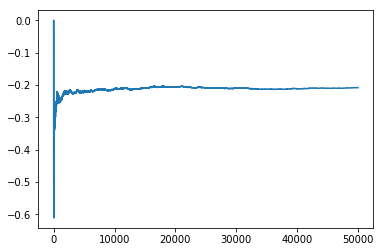

For episode: 1000


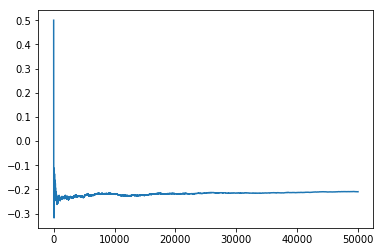

For episode: 1200


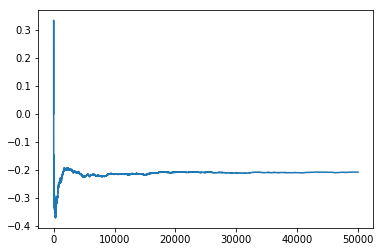

For episode: 1400


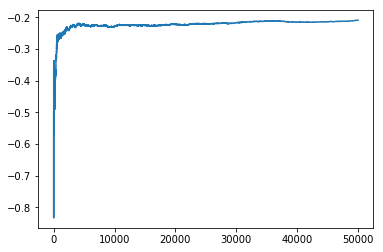

For episode: 1600


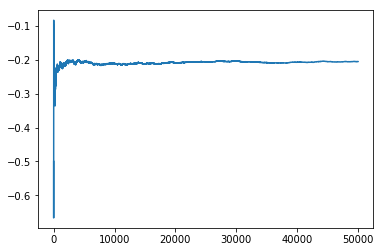

For episode: 1800


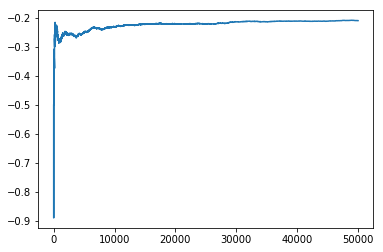

For episode: 2000


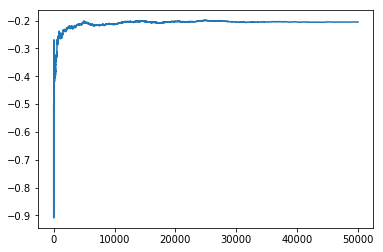

In [137]:
num_episodes_values = range(200, 1600, 200)
for num_episodes_value in num_episodes_values:
    agent = BJAgent(env=env,episodes_to_train=num_episodes_value)
    average_rewards = agent.train(gamma=0.9,
                                   alpha=0.5, 
                                   epsilon=0.2,
                                   maxiter=1000, 
                                   maxstep=50)
    print("For episode:",num_episodes_value)
    plt.plot(average_rewards)
    plt.show()

### Low Gamma

For episode: 200


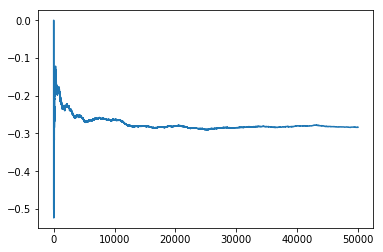

For episode: 400


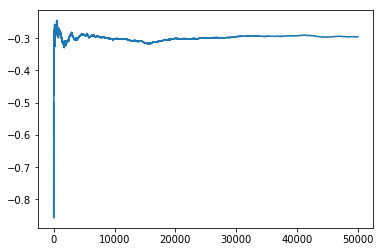

For episode: 600


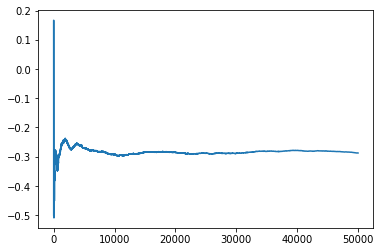

For episode: 800


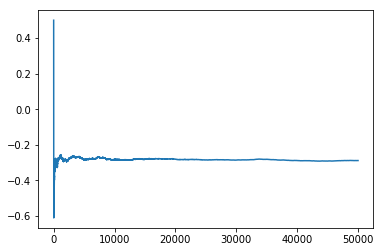

For episode: 1000


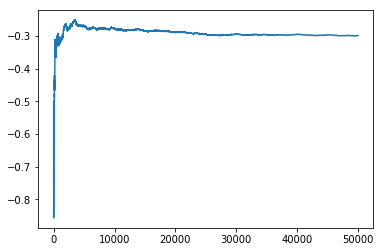

For episode: 1200


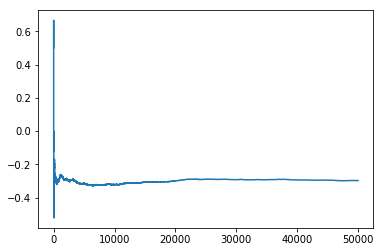

For episode: 1400


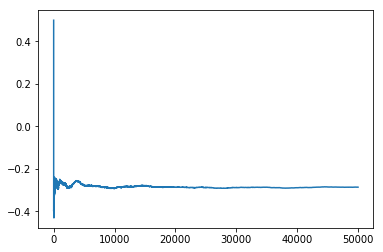

For episode: 1600


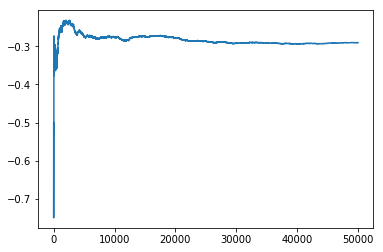

For episode: 1800


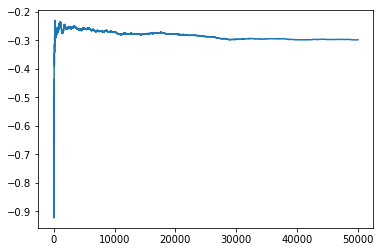

For episode: 2000


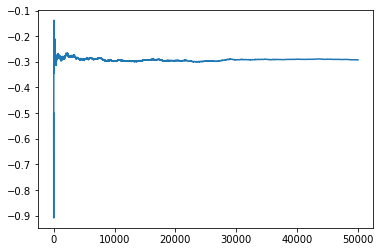

In [138]:
num_episodes_values = range(200, 1600, 200)
for num_episodes_value in num_episodes_values:
    agent = BJAgent(env=env,episodes_to_train=num_episodes_value)
    average_rewards = agent.train(gamma=0.2,
                                   alpha=1, 
                                   epsilon=0.2,
                                   maxiter=1000, 
                                   maxstep=50)
    print("For episode:",num_episodes_value)
    plt.plot(average_rewards)
    plt.show()

In [139]:
### High Alpha

For episode: 200


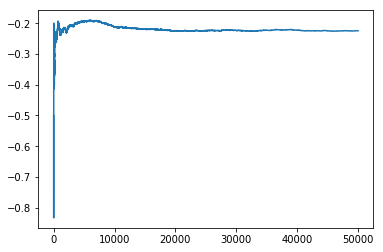

For episode: 400


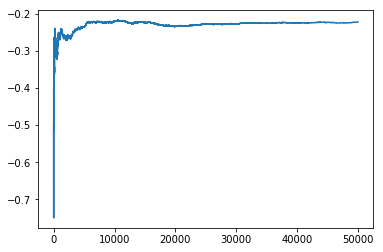

For episode: 600


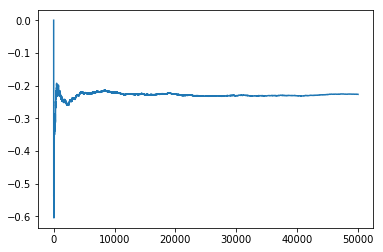

For episode: 800


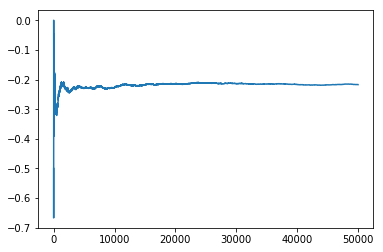

For episode: 1000


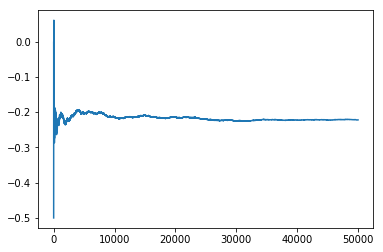

For episode: 1200


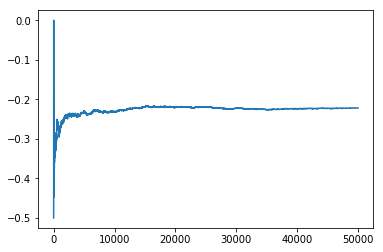

For episode: 1400


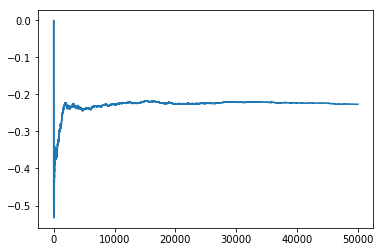

For episode: 1600


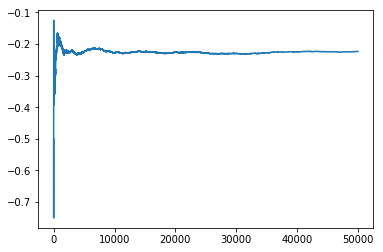

For episode: 1800


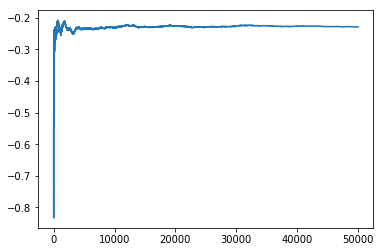

For episode: 2000


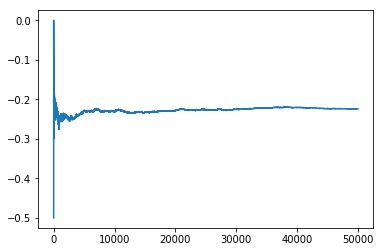

In [140]:
num_episodes_values = range(200, 1600, 200)
for num_episodes_value in num_episodes_values:
    agent = BJAgent(env=env,episodes_to_train=num_episodes_value)
    average_rewards = agent.train(gamma=0.9,
                                   alpha=1, 
                                   epsilon=0.2,
                                   maxiter=1000, 
                                   maxstep=50)
    print("For episode:",num_episodes_value)
    plt.plot(average_rewards)
    plt.show()

# IV - Results

The best parameters would be gamma=0.1, alpha=0.5, epsilon=0.1.

Choice Of Epsilon: When I experimented with high epsilon value, the exploration rate was very high. The agent achieved high average reward when it was at 800 episode. When the epsilon rate was low it achieved the high average reward when it was at 200 episode. So, I choose low epsilon value.

Choice of Alpha: The alpha is between 0 to 1. I choose the alpha rate as 0.5 as it reaches the highest rewards during the initial stages of epsilon.

Choice of Gamma: Gamma or discount factor emphasizes on the future rewards. If gamma value is zero then it will consider only the current rewards. If the gamma value is high or 1 it will search for long term rewards. I choose to keep the gamma value low to consider short term rewards.

Reading and analysis of learning results and plots:

I find the gamma value should be low in this case as we are interested in achieving short term goals so as to not go in loss.The epsilon rate is taken to be low to allow exploration.

# V. Conclusions

I found BlackJack implementation difficult. I was not able to draw the countour plots for BlackJack.

I have done citation for black jack: https://curiouscoder.space/blog/machine%20learning/teaching-a-computer-blackjack-using-reinforcement-learning/

In maze problem, I had difficluty writing the test case. The plots change every time I execute.

# Extra Credit

- Let us have Blackjack-V0 Tournament in class (Mar 22nd.)!
- Top 4 students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Blackjack
 | 5| Includes description of maze problem
 | 5| Explains the Backjack-V0 (OpenAI Gym)
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
